## Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset Generation 
Let us generate a 2 dimensional dataset for $n$ samples that arise from normally distributed data, such that two _classes_ $\mathcal{D}_{1,2}$ arise, for means $\mu_{1}=\left(1,1\right)^{\intercal}$, $\mu_{1}=\left(-1,-1\right)^{\intercal}$ and  variance $\bm{\sigma}= 2\mathbb{I}_{2\times 2}$.


In [3]:
def class_gen(samples=20):
    mu_1 = np.array([4, 4])
    mu_2 = np.array([-4,-4])
    sigma = np.eye(2,2)
    class1 = np.random.multivariate_normal(mu_1, sigma, samples)    
    class2 = np.random.multivariate_normal(mu_2, sigma, samples)
    return class1, class2

For illustration sake let us plot the class scatter distribution, recall that $\mathcal{C}_i \in \Reals^{n \times 2}$

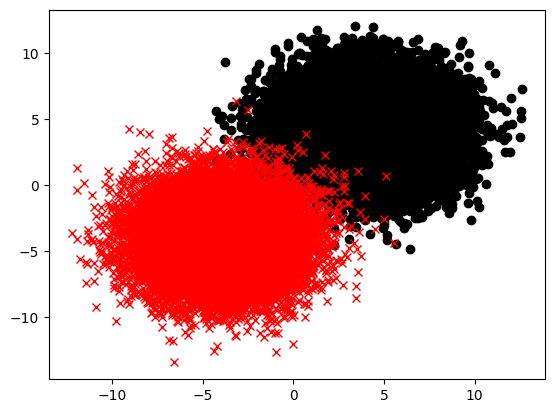

In [5]:
class_samples = 20000
class1, class2 = class_gen(class_samples)
fig, ax = plt.subplots()
ax.plot(class1[:,0], class1[:,1], 'ok')
ax.plot(class2[:,0], class2[:,1], 'xr')

Observe that the data scatter suggests that the classes are linearly spearable.
In order to perform supervised learning classification, let us build the array of tags for each class $Y_1, \ Y_2$

In [6]:
Y1 = np.ones((class_samples,1));
Y2 = -1 * Y1; 
Y_label = np.vstack([Y1,Y2]);

## Data Augmentation 

In [7]:
X = np.vstack([class1,class2]);
extra_dimension = np.ones((2*class_samples,1));
(extra_dimension.shape, X.shape)

((40000, 1), (40000, 2))

In [8]:
X_tilde = np.hstack([extra_dimension,X])
X.shape, X_tilde.shape

((40000, 2), (40000, 3))

Now that we have our extended data, we've only require to obtain the so-called _covariant matrix_ $C = \tilde{\bm{X}}^\intercal \tilde{\bm{X}}$

In [9]:
CovX = np.matmul(X_tilde.T, X_tilde)

The weights arise as $C^{-1}\tilde{X}^{\intercal}\tilde{Y}$ 

In [10]:
W = np.matmul( np.linalg.inv(CovX) , np.matmul(X_tilde.T,Y_label) )
W 

array([[0.00130542],
       [0.12205399],
       [0.12027562]])

In [11]:
estimated_value = np.matmul(X_tilde, W)
estimated_value.shape

(40000, 1)

Recall that the linear classificator is an scalar function of the form $\bm{h}\left(\bm{x}^{(i)}; \bm{\Theta} \right)\equiv\hat{\bm{y}}^{(i)} = \bm{W}^\intercal \bm{x}^{(i)} + \bm{b} $, however, for this binary class prediction, we still need to assign a label for each hypotheses. From the $\verb+Y_labels+$ variable, we know that each sample $\bm{x}^{(i)}$ is assign to an binary label $\bm{y}^{(i)} \in \left\lbrace 1, -1 \right\rbrace:=\mathcal{\sigma}_{\text{b}}$, hence our prediction arise by simply taking the sign of the $\verb+estimated_value+$.

In [12]:
predicted_labels  = np.sign(estimated_value)
predicted_labels[predicted_labels==0]


array([], dtype=float64)

In [13]:
predicted_labels.shape

(40000, 1)

Finally, we can evaluate the prediction performance by appealing to the 2-norm, or LSQ:
\begin{gather*}
\mathcal{L} = \sum_{i = 1}^{n}\left(\hat{\bm{y}}^{(i)} - \bm{y}^{(i)}\right)^2 \\
            = \sum_{i = 1}^{n}\left\|\hat{\bm{y}}^{(i)} - \bm{y}^{(i)}\right\|^2 \\
            = \sum_{i = 1}^{n}\left\langle\hat{\bm{y}}^{(i)} - \bm{y}^{(i)},\hat{\bm{y}}^{(i)} - \bm{y}^{(i)}\right\rangle \\
\mathcal{L} = \sum_{i = 1}^{n}\left(\hat{\bm{y}}^{(i)} - \bm{y}^{(i)}\right)^{\intercal} \left(\hat{\bm{y}}^{(i)} - \bm{y}^{(i)}\right)
\end{gather*}
Notice from the shape of our predictions that we can lump all samples and perform the metric evaluation within a oneliner;

In [14]:
prediction_error = predicted_labels- Y_label
prediction_error.shape


(40000, 1)

In [15]:
squared_performance_error = np.dot(prediction_error.T,prediction_error)
squared_performance_error


array([[0.]])

And _voilà_ we've found that the linearly separable data has been perfectly predicted by the linear classificator.

Of course, for this codding example we've ommited the _Supervised Training Process_, as we've used the entire dataset for training and validation. However, we've arrived to valuable insights about the _magic_ behind the simpler supervised learning algorithm. 